# Analysis of user collection

In this notebook, the retrieved results of the user collection is analyzed.

In [105]:
import glob
import time
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Configure modules like pandas and plotting libraries.

In [106]:
plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option('display.min_rows', 24)

Folders and constants

In [107]:
fp_figs = Path("figs")

annotated_users = Path("results", "annotated.csv")

## Dataset
In this section, output data of the various methods is collected and combined. 

In [108]:
data_files = glob.glob("methods/*/results/*.csv")

for i, d in enumerate(data_files):
    print(i+1, d)

1 methods/github_org_commit/results/research_org_commits.csv
2 methods/github_search/results/github_search_repo.csv
3 methods/github_search/results/github_search_topic.csv
4 methods/github_search/results/github_search_users.csv
5 methods/manual_collection/results/manual_users.csv


All files is loaded and combined in a single dataset. The dataset contains the variables:
- `source` The source is the method used to find the user, e.g. paperswithcode, github_search_users, github_search_topics. The name is derived from the file name of the results file.
- `service` The service the user profile is found, e.g. github.com, github.warwick.ac.uk, gitlab.
- `date` The date of collection. This can be useful when updating results.
- `user_id` The user handle of the found user. 

In [109]:
df_user_names = pd.concat(
    [pd.read_csv(fp) for fp in data_files], 
    axis=0, 
    keys=data_files, 
    names=["source", "row"]
) \
    .reset_index("source") \
    .reset_index(drop=True)

df_user_names["source"] = df_user_names["source"].apply(lambda x: Path(x).stem)
df_user_names

,source,user_id,date,service
0,research_org_commits,hallerp,2023-09-06,github
1,research_org_commits,jakobchwastek,2023-09-06,github
2,research_org_commits,lenabolliger,2023-09-06,github
3,research_org_commits,LenaJaeger,2023-09-06,github
4,research_org_commits,prassepaul,2023-09-06,github
5,research_org_commits,sarahkiener,2023-09-06,github
6,research_org_commits,Shuwen27,2023-09-06,github
7,research_org_commits,SiQube,2023-09-06,github
8,research_org_commits,tschirner,2023-09-06,github
9,research_org_commits,Baschdl,2023-09-08,github


## Findability

The following results shows how many times user handles are found with each retrieval method. If a user is found with multiple methods, the findability of the user can be consider to be better. 

### Cross table user and method

Create a cross table with service and user on one axis and the extraction method on the other axis.

In [110]:
df_name_method_crosstab = df_user_names \
    .drop("date", axis=1) \
    .groupby(["service", "user_id", "source"]) \
    .size() \
    .unstack("source") \
    .fillna(0) \
    .applymap(int)

df_name_method_crosstab

source                            github_search_repo  github_search_users  \
service    user_id                                                          
github     Baschdl                                 0                    0   
           FelixDombek                             0                    0   
           KatrinSch                               0                    0   
           LenaJaeger                              0                    0   
           MaxOstrowski                            0                    0   
           Shuwen27                                0                    0   
           SiQube                                  0                    0   
           TScheffler                              0                    0   
           arne-cl                                 0                    0   
           fpottbaecker                            0                    0   
           hallerp                                 0                    0   
           jakobchwastek                           0                    0   
...                                              ...                  ...   
github.com vasishthlabor                           1                    0   
           verdeev                                 0                    1   
           vykimo                                  1                    0   
           warpaint97                              1                    0   
           whuiskamp                               0                    0   
           wschwanghart                            2                    1   
           xarxaxdev                               0                    0   
           yadavhimanshu059                        0                    1   
           yanweiser                               1                    0   
           yerkesoul                               0                    0   
           yuxizhang11                             0                    0   
           zentrum-lexikographie                   2                    0   

source                            manual_users  research_org_commits  
service    user_id                                                    
github     Baschdl                           0                     1  
           FelixDombek                       0                     1  
           KatrinSch                         0                     1  
           LenaJaeger                        0                     2  
           MaxOstrowski                      0                     1  
           Shuwen27                          0                     2  
           SiQube                            0                     2  
           TScheffler                        0                     1  
           arne-cl                           0                     1  
           fpottbaecker                      0                     1  
           hallerp                           0                     2  
           jakobchwastek                     0                     2  
...                                        ...                   ...  
github.com vasishthlabor                     1                     0  
           verdeev                           0                     0  
           vykimo                            1                     0  
           warpaint97                        1                     0  
           whuiskamp                         1                     0  
           wschwanghart                      4                     0  
           xarxaxdev                         1                     0  
           yadavhimanshu059                  3                     0  
           yanweiser                         1                     0  
           yerkesoul                         2                     0  
           yuxizhang11                       1                     0  
           zentrum-lexikographie             2                     0  

[3

The following example can be uncommented to find the findabilty of a specific project. 

In [111]:
# df_name_method_crosstab.loc[('github.com', 'asreview')]

### Findability per user

The following table show which users are found with most collection strategies. The count indicates the number of methods, and the relative score the number relative to the total number of collection strategies. 

In [112]:
# compute the count
df_name_findability = (df_name_method_crosstab > 0) \
    .astype(int) \
    .sum(axis=1) \
    .sort_values(ascending=False) \
    .to_frame(name="count")

# compute relative score
df_name_findability["relative"] = df_name_findability["count"] / len(data_files)

df_name_findability


count  relative
service    user_id                          
github.com brechtknecht          3       0.6
           annameide             3       0.6
           wschwanghart          3       0.6
           mittelmark            3       0.6
           UP-RS-ESP             3       0.6
           fsr-de                3       0.6
           bptlab                2       0.4
           alyonavyshnevska      2       0.4
           niklhart              2       0.4
           nickpodratz           2       0.4
           mmrabe                2       0.4
           miduku                2       0.4
...                            ...       ...
           baudisch              1       0.2
           dmrwal                1       0.2
           benlowit              1       0.2
           bgailleton            1       0.2
           bglaetzer             1       0.2
           bgroenks96            1       0.2
           blblblu               1       0.2
           braunfuss             1       0.2
           ctiedt                1       0.2
github     FelixDombek           1       0.2
github.com dieknolle3333         1       0.2
           delwarhub             1       0.2

[303 rows x 2 columns]

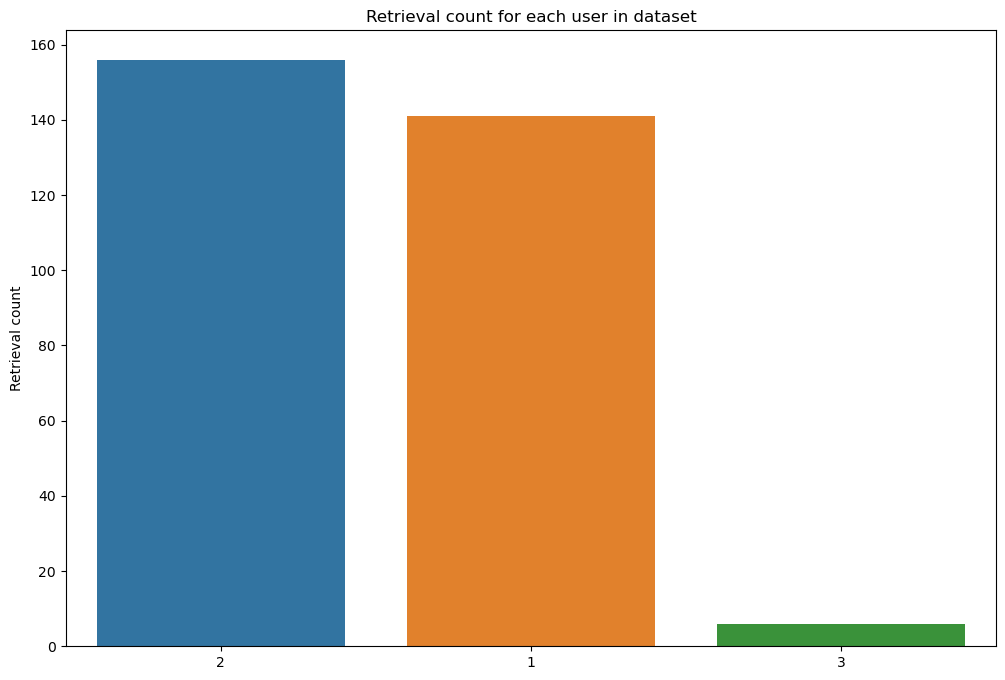

In [113]:
retrieval_count = df_name_findability["count"].value_counts().to_frame(name="Retrieval count")

sns.barplot(
    x=retrieval_count.index.astype(str), 
    y=retrieval_count["Retrieval count"]
)
plt.title("Retrieval count for each user in dataset")
plt.savefig(Path(fp_figs, 'user_collection_user_findability.png'))

### Findability per method

This table indicates how succeful a method is collecting users.

In [114]:
df_method_findability = (df_name_method_crosstab > 0) \
    .astype(int) \
    .sum(axis=0) \
    .sort_values(ascending=False) \
    .to_frame(name="count")

df_method_findability

,count
source,
manual_users,269
github_search_users,92
github_search_repo,85
research_org_commits,25


In [115]:
df_method_findability

,count
source,
manual_users,269
github_search_users,92
github_search_repo,85
research_org_commits,25


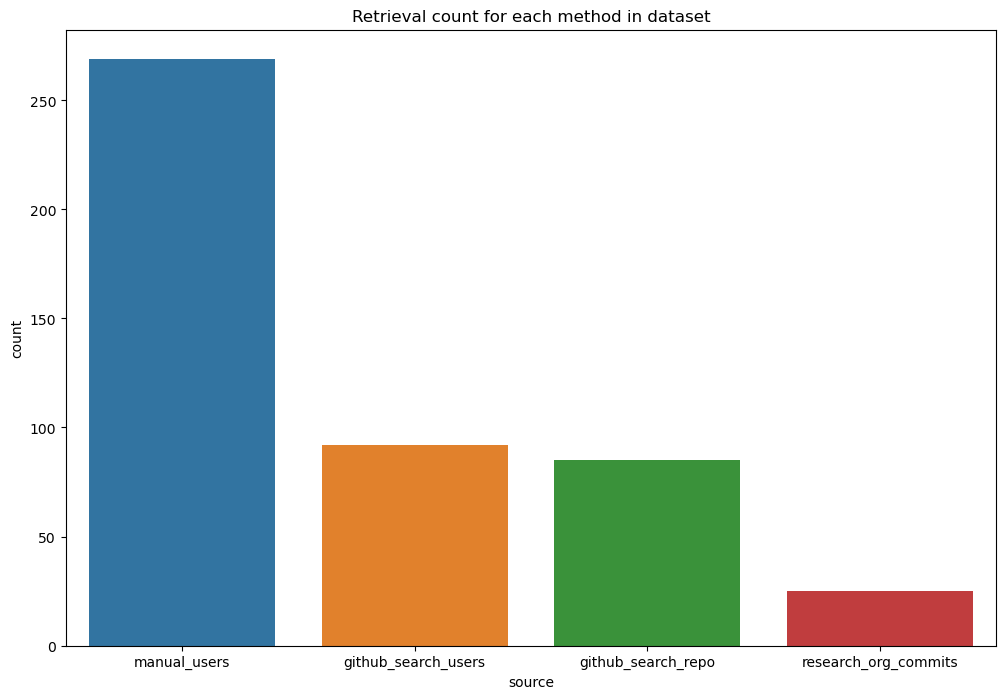

In [116]:
sns.barplot(
    x=df_method_findability.index, 
    y=df_method_findability["count"]
)
plt.title("Retrieval count for each method in dataset")
plt.savefig(Path(fp_figs, 'user_collection_method_findability.png'))

## Filtering of users

Not all users collected in the previous steps are relevant to the analysis. Some are not (or no longer) part of the organisation, or excluded for other reasons (for example students).

In [121]:
df_annotated_users = pd.read_csv(annotated_users, delimiter=';')
print(df_annotated_users.columns)

df_annotated_users[
    ["user_id", 
     "is_student", 
     "is_employee", 
     "is_currently_employed", 
     "is_research_group", 
     "final_decision"
    ]
]

Index(['user_id', 'source', 'service', 'date', 'id', 'node_id', 'avatar_url',
       'gravatar_id', 'url', 'html_url', 'followers_url', 'following_url',
       'gists_url', 'starred_url', 'subscriptions_url', 'organizations_url',
       'repos_url', 'events_url', 'received_events_url', 'type', 'site_admin',
       'name', 'company', 'blog', 'location', 'email', 'hireable', 'bio',
       'twitter_username', 'public_repos', 'public_gists', 'followers',
       'following', 'created_at', 'updated_at', 'is_student', 'is_employee',
       'is_currently_employed', 'is_research_group', 'final_decision', 'note',
       'source_annotated', 'service_annotated', 'date_annotated'],
      dtype='object')


,user_id,is_student,is_employee,is_currently_employed,is_research_group,final_decision
0,030jmk,True,NaN,NaN,NaN,NaN
1,030jmk,True,NaN,NaN,NaN,NaN
2,87surendra,NaN,NaN,NaN,NaN,NaN
3,Clarkson University,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,"Computational Linguistics""",NaN,NaN,NaN,NaN,NaN
6,a-klaus,NaN,NaN,NaN,NaN,NaN
7,"Computational Linguistics""",NaN,NaN,NaN,NaN,NaN
8,a-moi,NaN,NaN,NaN,NaN,NaN
9,| e-mail:,NaN,NaN,NaN,NaN,NaN


In [123]:
df_annotated_users_included = df_annotated_users[df_annotated_users["final_decision"] == 1]

print("The number of included users is", len(df_annotated_users_included))

The number of included users is 0


## Properties of users

In [126]:
df_annotated_users_included \
    .loc[df_annotated_users_included["final_decision"] == 1, "is_research_group"] \
    .fillna(0) \
    .value_counts()

Series([], Name: is_research_group, dtype: int64)

,user_id,public_repos


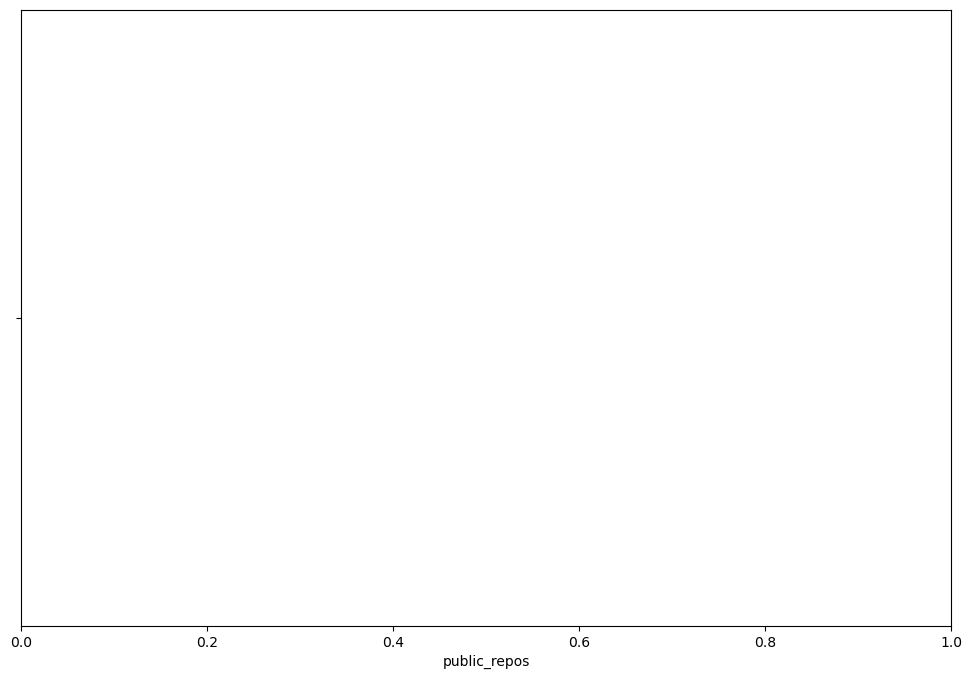

In [127]:
# create a boxplot with swarm
ax = sns.boxplot(x='public_repos', data=df_annotated_users_included)
ax = sns.swarmplot(x='public_repos', data=df_annotated_users_included, color=".25")

# output users with most public repos
df_annotated_users_included[['user_id', 'public_repos']].sort_values('public_repos', ascending=False).head(10)

,user_id,public_gists


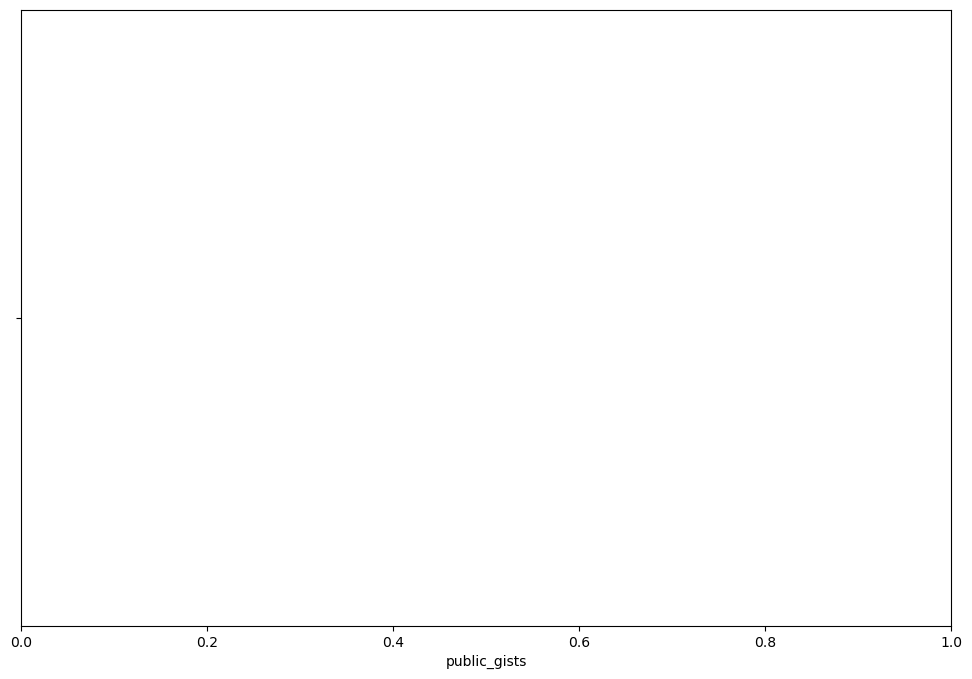

In [128]:
sns.boxplot(x='public_gists', data=df_annotated_users_included)
df_annotated_users_included[['user_id', 'public_gists']].sort_values('public_gists', ascending=False).head(10)

,user_id,followers


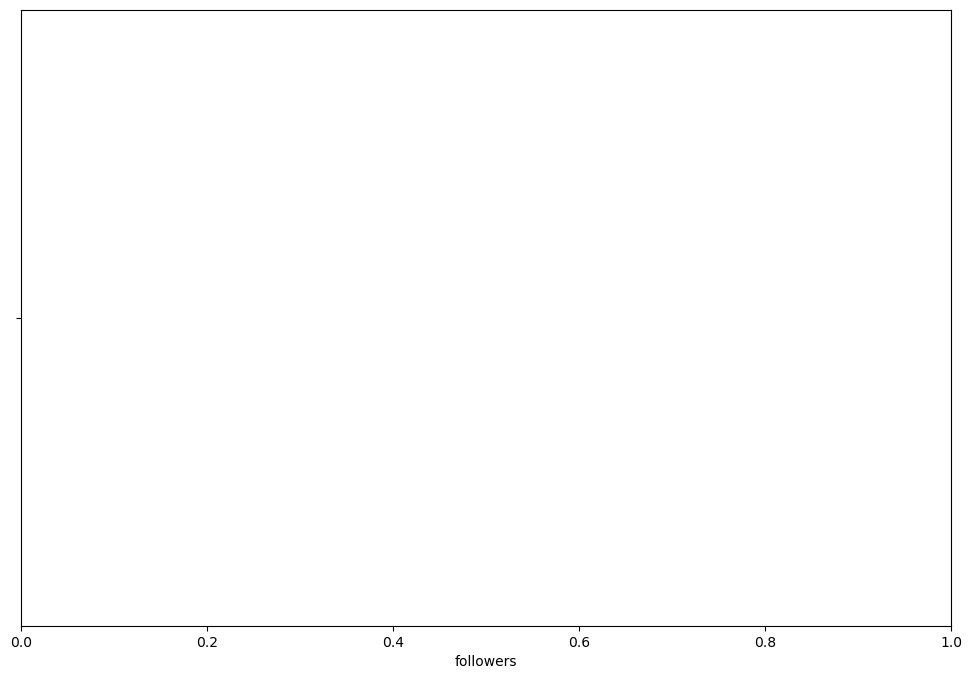

In [129]:
ax = sns.boxplot(x='followers', data=df_annotated_users_included, showfliers=False)

df_annotated_users_included[['user_id', 'followers']].sort_values('followers', ascending=False).head(10)

,user_id,following


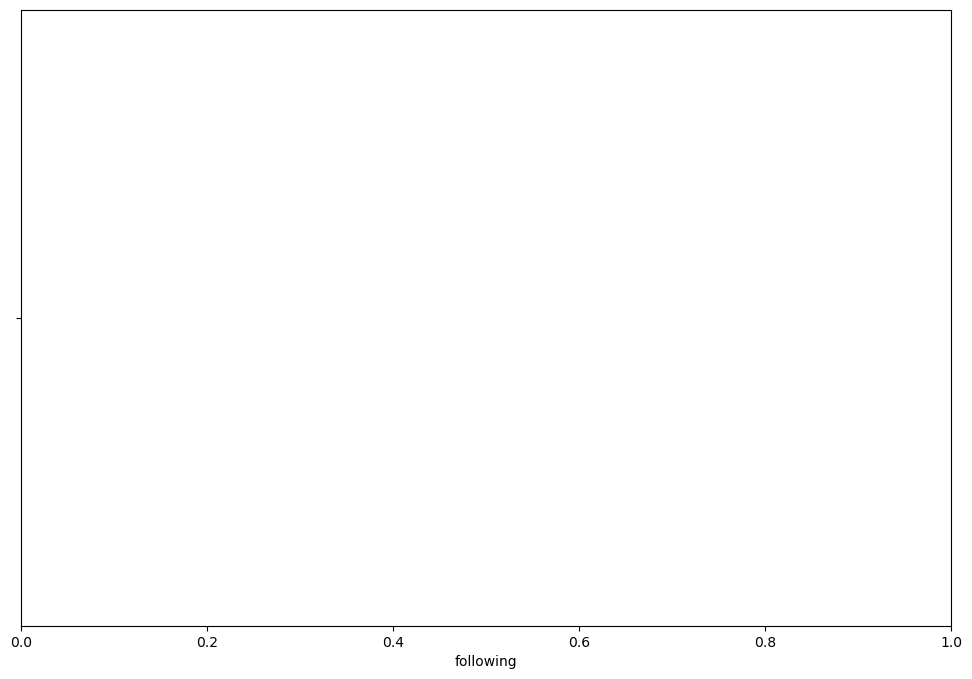

In [130]:
sns.boxplot(x=df_annotated_users_included['following'], showfliers = False)
df_annotated_users_included[['user_id', 'following']].sort_values('following', ascending=False).head(10)
